In [3]:
!pip3 install plotly
!pip3 install nltk
!pip3 install openai
!pip3 install yfinance

In [4]:
# all require package
## for analysis
import pandas as pd
import re
import os
import openai
from time import sleep
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import yfinance as yf
from collections import Counter
## for plot
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
# from plotly import offline
# offline.init_notebook_mode(connected = False)
# pio.renderers.default = 'iframe'
pio.renderers.default = 'svg'

[nltk_data] Downloading package stopwords to /Users/thl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part1: Find ticker symbol through text processing

In [5]:
def remove_hyperlink(body):
    body = re.sub(r'https?://\S+|www\.\S+', '', body)
    # body = re.sub(r'/\S/\S+', '', body)
    return body

def remove_punctuation(body):
    punctuation = '!"#%&\()*+,-.:;<=>?@[\\]^_`{|}~'
    body = re.sub(rf'[{punctuation}\\\s]+', " ", body)
    return body

In [6]:
df = pd.read_csv("./dataset/reddit_wsb.csv")
df["body"].fillna(value = "", inplace = True)
df["body"] = df["title"] + ": "+ df["body"]
df["body"] = df["body"].apply(remove_hyperlink)
df["body"] = df["body"].apply(remove_punctuation)

## Find ticker symbol

In [7]:
stopwords = stopwords.words("english")
stopwords = set([i.upper() for i in stopwords])
def remove_stopword(body):
    words = set(body)
    words = words - stopwords
    return words

def find_potential_ticker_symbol(body):
    return re.findall(r'\b[A-Z]+\b', body)

remove the stopword and find the capitial word (potential ticker symbol)

In [8]:
df["ticker symbol"] = df["body"]
df["ticker symbol"] = df["ticker symbol"].apply(find_potential_ticker_symbol)
df["ticker symbol"] = df["ticker symbol"].apply(remove_stopword)

In [9]:
potential_ticker_symbol = set()
for i in df["ticker symbol"]:
    potential_ticker_symbol.update(i)

In [10]:
potential_ticker_symbol

{'PCR',
 'GOTHAM',
 'BANKROLL',
 'CARB',
 'CHASE',
 'CHNCPIALLMINMEI',
 'VYNE',
 'WARFARE',
 'FINNANCIAL',
 'DFODQ',
 'MODE',
 'RIGHTS',
 'ACCESSWIRE',
 'IMAGING',
 'COUPANG',
 'IYZ',
 'PARADIGM',
 'KABOOM',
 'GOOOOOOOOO',
 'GOPRO',
 'CYBERSECURITY',
 'BRINGS',
 'NIP',
 'MOOONNNNN',
 'MARKUP',
 'EWT',
 'NGDV',
 'MOMENT',
 'HAHAH',
 'CINEWORLD',
 'CACC',
 'SHLS',
 'PITCHFORKS',
 'ALEXA',
 'TALE',
 'COMIN',
 'PRIMA',
 'MOAS',
 'STLA',
 'ATTRACTIVE',
 'DEVELOPER',
 'TITS',
 'DILIGENT',
 'ANNOUNCMENT',
 'BLL',
 'WRK',
 'NUMI',
 'LDL',
 'PINNED',
 'ANVS',
 'POC',
 'SPARROW',
 'MCAD',
 'FICO',
 'PLANTING',
 'CONFLICT',
 'MOC',
 'SAF',
 'MORGANS',
 'FFFF',
 'EYED',
 'IMPORTANTLY',
 'CORNERED',
 'LOCKED',
 'FXY',
 'NEWLY',
 'GOOOO',
 'HEAR',
 'PFAANG',
 'PICK',
 'WORKS',
 'NOO',
 'CAPTURE',
 'SON',
 'HPV',
 'EQNR',
 'SMALLER',
 'KNGS',
 'STILK',
 'INNNNN',
 'INO',
 'SWOT',
 'DAO',
 'SEEMED',
 'MRQ',
 'GNE',
 'POOLS',
 'PLAY',
 'CAT',
 'WMT',
 'AMZ',
 'PEANUTS',
 'HPPD',
 'DAWN',
 'DENYING',
 '

check is the pontential ticker symbol really exist

In [ ]:
ticker_symbol = set()
for i in potential_ticker_symbol:
    ticker = yf.Ticker(i)
    try:
        _ = ticker.info
        ticker_symbol.add(i)
        print(f"{i} is a ticker symbol")
    except:
        pass

P is a ticker symbol
WRAP is a ticker symbol
PRF is a ticker symbol
RMB is a ticker symbol
YHE is a ticker symbol
VXRT is a ticker symbol
ABI is a ticker symbol
DPU is a ticker symbol
PEZ is a ticker symbol
BODY is a ticker symbol
TECL is a ticker symbol
OGI is a ticker symbol
PUBM is a ticker symbol
KHC is a ticker symbol
RAM is a ticker symbol
UGA is a ticker symbol
CSIQ is a ticker symbol
CRC is a ticker symbol
IK is a ticker symbol
NTIA is a ticker symbol
IYM is a ticker symbol
IBM is a ticker symbol
BID is a ticker symbol
LS is a ticker symbol
DGBP is a ticker symbol
ECB is a ticker symbol
DIX is a ticker symbol
WST is a ticker symbol
BCG is a ticker symbol
BGFV is a ticker symbol
NOS is a ticker symbol
ZS is a ticker symbol
TSX is a ticker symbol
SMOL is a ticker symbol
MRE is a ticker symbol
UDW is a ticker symbol
XLV is a ticker symbol
LGND is a ticker symbol
DB is a ticker symbol
SWBI is a ticker symbol
CID is a ticker symbol
MAE is a ticker symbol
FMI is a ticker symbol
SWN i

only leave the really exist ticker symbol

In [169]:
def extract_ticker_symbol(body):
    return body & ticker_symbol

In [182]:
df["ticker symbol"] = df["ticker symbol"].apply(extract_ticker_symbol)

select the top 10 ticker symbol based on its appear frequence

In [13]:
# all_ticker_symbol = list()
# for i in df["ticker symbol"]:
#     all_ticker_symbol = all_ticker_symbol + list(i)
# ts_freq = dict(Counter(all_ticker_symbol))
# ts_freq_top_10 = dict(sorted(ts_freq.items(), key=lambda item: item[1], reverse = True)[:10])
df.loc[:,list(ts_freq_top_10.keys())] = False
# if appear set True
for i in range(df.shape[0]):
    df.loc[i, list(df.loc[i, "ticker symbol"] & set(ts_freq_top_10.keys()))] = True

In [200]:
ts_freq_top_10

{'GME': 12954,
 'AMC': 4976,
 'DD': 2974,
 'WSB': 2942,
 'HOLD': 2656,
 'YOLO': 2356,
 'BB': 2109,
 'US': 1746,
 'BUY': 1734,
 'NOK': 1567}

In [10]:
df

,title,score,id,url,comms_num,created,body,timestamp,ticker symbol,GME,AMC,DD,WSB,HOLD,YOLO,BB,US,BUY,NOK
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,It's not about the money it's about sending a ...,2021-01-28 21:37:41,{},False,False,False,False,False,False,False,False,False,False
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,Math Professor Scott Steiner says the numbers ...,2021-01-28 21:32:10,{DISASTER},False,False,False,False,False,False,False,False,False,False
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,Exit the system The CEO of NASDAQ pushed to ha...,2021-01-28 21:30:35,"{CEO, GME, SEC, NASDAQ}",True,False,False,False,False,False,False,False,False,False
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NEW SEC FILING FOR GME CAN SOMEONE LESS RETARD...,2021-01-28 21:28:57,"{SEC, PLEASE, LESS, NEW, SOMEONE, RETARDED, FI...",True,False,False,False,False,False,False,False,False,False
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,Not to distract from GME just thought our AMC ...,2021-01-28 21:26:56,"{GME, AMC}",True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,What I Learned Investigating SAVA FUD Spreader...,2021-08-02 15:03:27,"{UK, DD, INTEREST, ROB, SAVA, TLDR, STAT, WALL...",False,False,True,False,False,False,False,False,False,False
53183,"Daily Popular Tickers Thread for August 02, 20...",228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,Daily Popular Tickers Thread for August 02 202...,2021-08-02 15:01:03,"{YOLO, DD, WSB, BABA, AMD, GME}",True,False,True,True,False,True,False,False,False,False
53184,Hitler reacts to the market being irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,Hitler reacts to the market being irrational,2021-08-02 13:59:35,{},False,False,False,False,False,False,False,False,False,False
53185,"Daily Discussion Thread for August 02, 2021",338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,Daily Discussion Thread for August 02 2021 You...,2021-08-02 13:00:16,"{WSB, DD, YOLO}",False,False,True,True,False,True,False,False,False,False


## Plot the stock price and the appear frequence of ticker symbol

In [14]:
def get_freq_list(timestamps, interval: timedelta, start_time: datetime = None, end_time: datetime = None) -> pd.DataFrame:
    datetime_list = [datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in sorted(timestamps)] # convert string to datetime
    if start_time == None:
        start_time = datetime_list[0]
    if end_time == None:
        end_time = datetime_list[-1] + timedelta(seconds=1)
        
    datetime_list = [elem for elem in datetime_list if elem >= start_time and elem < end_time] # choose timestamps in the range from start_time to end_time
    datetime_list = [(elem - start_time) // interval for elem in datetime_list] # assign each timestamps to each interval
    datetime_list = [start_time + interval * elem for elem in datetime_list] # restore the real timestamps of each interval
    freq_list = list(Counter(datetime_list).items()) # aggregate timestamps into each interval

    if freq_list[-1][0] < end_time - interval: # add end bound
        freq_list.append((end_time - interval, 0))
    if freq_list[0][0] > start_time: # add start bound
        freq_list.insert(0, (start_time, 0))
    
    for i in range(len(freq_list)-2, -1, -1): # add 0s into the interval between two real records
        if freq_list[i + 1][0] - freq_list[i][0] > 2 * interval:
            freq_list.insert(i + 1, (freq_list[i + 1][0] - interval, 0))
            freq_list.insert(i + 1, (freq_list[i][0] + interval, 0))
        elif freq_list[i + 1][0] - freq_list[i][0] == 2 * interval:
            freq_list.insert(i + 1, (freq_list[i][0] + interval, 0))
    
    freq_df = pd.DataFrame(freq_list, columns=["timestamp", "frequency"])
    return freq_df

In [17]:
def plot_stock_and_post_freq(df, target_ticker_symbol, stock_attr = "Open"):
    # get target ticker symbol post df
    df = df[df[target_ticker_symbol]]
    interval = timedelta(days=1)
    df_freq = get_freq_list(df["timestamp"], interval)
    # get stock price data
    ticker = yf.Ticker(target_ticker_symbol)
    start_date = sorted(df["timestamp"])[0].split(" ")[0]
    start_date = (datetime.strptime(start_date, "%Y-%m-%d") - timedelta(days=20)).strftime("%Y-%m-%d")
    end_date = sorted(df["timestamp"])[-1].split(" ")[0]
    df_stock = ticker.history(start = start_date, end = end_date, interval = "1d")
    # no stock data available
    if len(df_stock) == 0:
        return
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(
            x = df_stock.index,
            y = df_stock[stock_attr],
            name = f"Stock {stock_attr}",
            mode="markers+lines",
        ),
        secondary_y=False,
    )
    
    fig.add_trace(go.Bar(
            x=df_freq["timestamp"],
            y=df_freq["frequency"],
            opacity=0.5,
            xperiod=interval.total_seconds()*1000,
            name = "The number of post",
        ),
        secondary_y=True,
    )
    
    fig.update_yaxes(title_text=f"Stock {stock_attr}", secondary_y=False, title_font_color="blue")
    fig.update_yaxes(title_text="The number of post", secondary_y=True, title_font_color="red")
    fig.update_layout(
        title_text=f"Stock {stock_attr} and the number of post mentioned <b>{target_ticker_symbol}</b>",
        xaxis_title="day",
        width=1000,
        height=500,
    )
    fig.show()
    # offline.iplot(fig)

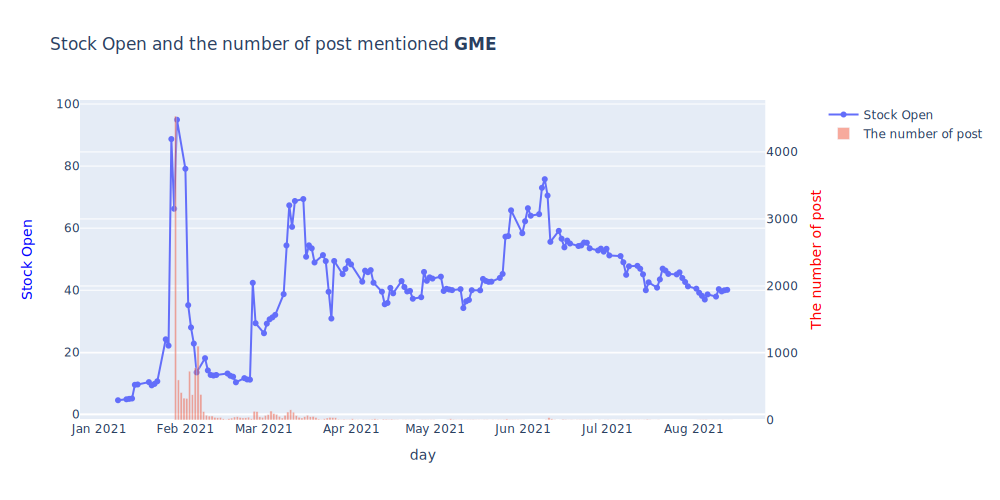

In [18]:
plot_stock_and_post_freq(df, "GME", stock_attr = "Open")

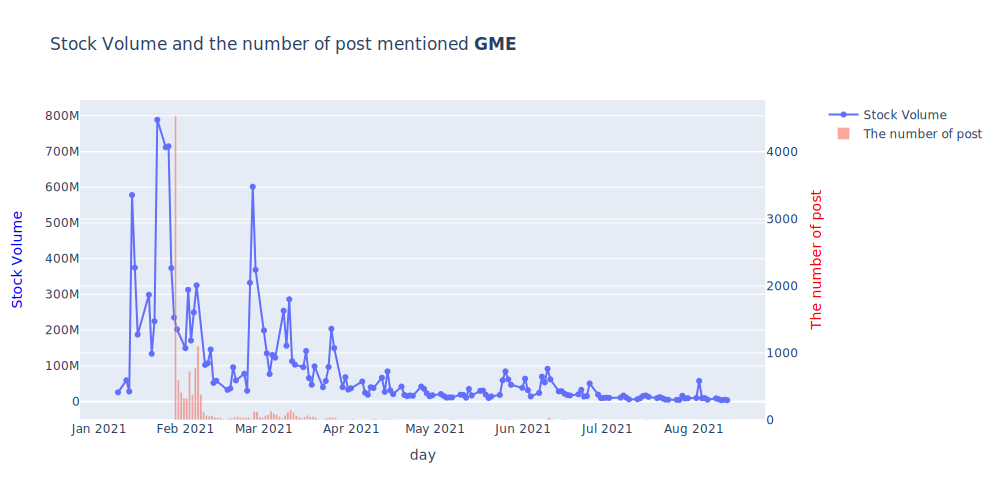

In [19]:
plot_stock_and_post_freq(df, "GME", stock_attr = "Volume")

# Part2: Find ticker symbol through Openai API
This section send the body of post to ChatGPT through openai API. We except ChatGPT give us a list of ticker symbol mentioned in the post and also tell us does the post indicate the rise or drop of this stock.<br>
For example, the response of ChatGPT will be:
```
    {"GME": "Rise", "NOK": NULL}
```
This response shows that in the given post, the stock price "GME" will rise, and the post also mentioned "NOK", but do not indicate its stock price will rise or drop.

## Clean up the body of post

In [20]:
def remove_hyperlink(body):
    body = re.sub(r'https?://\S+|www\.\S+', '', body)
    # body = re.sub(r'/\S/\S+', '', body)
    return body

def remove_punctuation(body):
    punctuation = '!"#%&\()*+,-.:;<=>?@[\\]^_`{|}~'
    body = re.sub(rf'[{punctuation}\\\s]+', " ", body)
    return body

In [133]:
df = pd.read_csv("./dataset/reddit_wsb.csv")
df["body"].fillna(value = "", inplace = True)
df["body"] = df["title"] + ": "+ df["body"]
df["body"] = df["body"].apply(remove_hyperlink)
df["body"] = df["body"].apply(remove_punctuation)
df["response"] = ""

## Send the body of post to ChatGPT

As openai API is not free, we only choose the post which its number of comment is above certain threshold

In [140]:
# Do the most comms post first
df = df.sort_values(by = ["comms_num"], ascending=False, ignore_index = True)
# Only choose the post 
comms_num_threshold = 600
df = df[df["comms_num"] > comms_num_threshold]

In [148]:
openai.api_key = "*****"

There is [rate limits](https://platform.openai.com/docs/guides/rate-limits/usage-tiers?context=tier-free) on openai API for free tier users, so we cannot send our request all at once.

In [150]:
question = 'Give me list of ticker symbols with indication mentioned in the each of context. If not give me "NULL". Also, show the "Rise" or "Drop" or "NULL" of each ticker symbols based on the context. The output should be a list of ticker symbols with rise or drop indication. Only show the output list, and do not show other extra word. For example, the output is like 1. {"GME": "Rise", "NOK": NULL} 2. {"NOK": "Drop"}: '
start = 0
end = df.shape[0]
original_step = 15
step = original_step
backoff_step = 4
backoff_limit = 10
i = start
while i < end and step > 0:
    print(i, step)
    body = ""
    for j in range(step):
        body = body + f"\n\n{j + 1}. {df.loc[i + j, 'body']}"
        
    messages = [
        {"role": "system", "content": "You are a stock analyst"},
        {"role": "user", "content": question + body}
    ]
    
    flag = 0
    for j in range(backoff_limit):
        try:
            completion = openai.chat.completions.create(
                model="gpt-3.5-turbo",
                messages = messages
            )
            flag = 1
            break
        # mean the request exceed token limit
        except openai.BadRequestError:
            print("Bad Request")
            flag = 2
            break
        except:
            print(f"retry {j}")
            sleep(60 * (j+1))

    if flag == 2:
        # reduce the amount of send message
        step -= backoff_step
        continue

    resp = completion.choices[0].message.content.split("\n")
    if len(resp) != step:
        print("Bad Response")
        flag = 2
        step = original_step
        i += step
        continue
        
    if flag == 0:
        print(f"stop at {i}")
        break
        
    df.loc[i:(i + step - 1), "response"] = pd.Series(resp, index = [k for k in range(i, i+step)])
    print(f"{i} finished")
    # wait about 1 minitue to send next request
    sleep(70)

    i += step
    step = original_step

In [154]:
# store the result
df.to_csv("./dataset/gpt_analysis_result.csv", index = False)

# Clean up the response data from ChatGPT

In [23]:
def clean_gpt_output(body):
    if type(body) == str:
        body = re.sub(r'[\s"\'}{]+', "", body)
        body = re.sub(r'^[0-9]+\.', "", body)
    
    return body

In [24]:
df = pd.read_csv("./dataset/gpt_analysis_result.csv")
useful_cols = ["comms_num", "timestamp", "response"]
df = df[useful_cols]
df["response"] = df["response"].apply(clean_gpt_output)
df = df[(df["response"] != "NULL") & (~df["response"].isna())].reset_index(drop = True)

In [111]:
df

,comms_num,timestamp,response
0,93268,2021-03-10 23:30:11,GME:Rise
1,83094,2021-02-25 00:24:58,GME:Rise
2,80586,2021-01-30 01:26:04,GME:Rise
3,77167,2021-01-29 23:11:27,GME:Rise
4,77080,2021-03-08 23:30:21,GME:Rise
...,...,...,...
792,663,2021-03-20 07:17:37,"GME:Rise,NOK:NULL"
793,662,2021-01-31 09:11:44,BB:Rise
794,646,2021-01-28 20:59:57,GME:Rise
795,640,2021-01-28 18:17:24,NOK:Rise


#### Create the new column for each ticker symbol

In [25]:
indication_map = {"null": 0, "rise": 1, "drop": 2}
test_fail_set = set(["NULL"])
for idx in range(df.shape[0]):
    resp_list = df.loc[idx, "response"].split(",")
    for resp in resp_list:
        m = re.match(r"(\w+):?(\w*)", resp)
        if m is None:
            continue
        ticker_symbol = m.group(1).upper()
        indication = m.group(2).lower()
        # already found find it is invalid
        if ticker_symbol in test_fail_set:
            continue
        # add new ticker symbol
        if ticker_symbol not in df.columns:
            try:
                # Check whether the ticker symbol exist
                _ = yf.Ticker(ticker_symbol).info
                df[ticker_symbol] = None
            except:
                # the ticker symbol do not exist
                test_fail_set.add(ticker_symbol)
                continue
        # add indication
        if indication in indication_map:
            df.loc[idx, ticker_symbol] = indication_map[indication]
        else:
            df.loc[idx, ticker_symbol] = 0

#### Only leave the ticker symbol which appear frequence is more then threshold

In [26]:
useful_cols

['comms_num', 'timestamp', 'response']

In [27]:
useful_ticker_symbol = []
threshold = 20
for t in df.columns[len(useful_cols):]:
    freq = df[~df[t].isna()].shape[0]
    if freq > threshold:
        useful_ticker_symbol.append(t)
        print(f"Ticker symbol {t} appear {freq} time")
        
df = df[useful_cols + list(useful_ticker_symbol)]

Ticker symbol GME appear 464 time
Ticker symbol BB appear 42 time
Ticker symbol AMC appear 95 time
Ticker symbol NOK appear 29 time


# Plot the stock price and the appear frequence of ticker symbol

In [28]:
def get_freq_list(timestamps, interval: timedelta, start_time: datetime = None, end_time: datetime = None) -> pd.DataFrame:
    datetime_list = [datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in sorted(timestamps)] # convert string to datetime
    if start_time == None:
        start_time = datetime_list[0]
    if end_time == None:
        end_time = datetime_list[-1] + timedelta(seconds=1)
        
    datetime_list = [elem for elem in datetime_list if elem >= start_time and elem < end_time] # choose timestamps in the range from start_time to end_time
    datetime_list = [(elem - start_time) // interval for elem in datetime_list] # assign each timestamps to each interval
    datetime_list = [start_time + interval * elem for elem in datetime_list] # restore the real timestamps of each interval
    freq_list = list(Counter(datetime_list).items()) # aggregate timestamps into each interval

    if freq_list[-1][0] < end_time - interval: # add end bound
        freq_list.append((end_time - interval, 0))
    if freq_list[0][0] > start_time: # add start bound
        freq_list.insert(0, (start_time, 0))
    
    for i in range(len(freq_list)-2, -1, -1): # add 0s into the interval between two real records
        if freq_list[i + 1][0] - freq_list[i][0] > 2 * interval:
            freq_list.insert(i + 1, (freq_list[i + 1][0] - interval, 0))
            freq_list.insert(i + 1, (freq_list[i][0] + interval, 0))
        elif freq_list[i + 1][0] - freq_list[i][0] == 2 * interval:
            freq_list.insert(i + 1, (freq_list[i][0] + interval, 0))
    
    freq_df = pd.DataFrame(freq_list, columns=["timestamp", "frequency"])
    return freq_df

In [41]:
def plot_stock_and_post_freq(df, target_ticker_symbol, stock_attr = "Open", resp_attr = 0):
    # get target ticker symbol post df
    if resp_attr == 0:
        df = df[~df[target_ticker_symbol].isna()]
    else:
        df = df[df[target_ticker_symbol] == resp_attr]
    interval = timedelta(days=1)
    df_freq = get_freq_list(df["timestamp"], interval)
    # get stock price data
    ticker = yf.Ticker(target_ticker_symbol)
    start_date = sorted(df["timestamp"])[0].split(" ")[0]
    start_date = (datetime.strptime(start_date, "%Y-%m-%d") - timedelta(days=20)).strftime("%Y-%m-%d")
    end_date = sorted(df["timestamp"])[-1].split(" ")[0]
    df_stock = ticker.history(start = start_date, end = end_date, interval = "1d")
    # no stock data available
    if len(df_stock) == 0:
        return
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(
            x = df_stock.index,
            y = df_stock[stock_attr],
            name = f"Stock {stock_attr}",
            mode="markers+lines",
        ),
        secondary_y=False,
    )
    
    fig.add_trace(go.Bar(
            x=df_freq["timestamp"],
            y=df_freq["frequency"],
            opacity=0.5,
            xperiod=interval.total_seconds()*1000,
            name = "The number of post",
        ),
        secondary_y=True,
    )
    
    fig.update_yaxes(title_text=f"Stock {stock_attr}", secondary_y=False, title_font_color="blue")
    fig.update_yaxes(title_text="The number of post", secondary_y=True, title_font_color="red")
    fig.update_layout(
        title_text=f"Stock {stock_attr} and the number of post mentioned <b>{target_ticker_symbol}</b>",
        xaxis_title="day",
        width=1000,
        height=500
    )
    
    fig.show()

In [42]:
useful_ticker_symbol

['GME', 'BB', 'AMC', 'NOK']

#### plot_stock_and_post_freq
##### Description
Plot the stock price provided ticker symbol and the number of post that mentioned this ticker symbol.<br>
The stock price is shown as blue line chart and the number of post is shown as red bar chart. And the interval of x axis is per day.
##### Parameters
- stock_attr<br>
  "Open": stock opening price.<br>
  "Volume": the volume of stock.<br>
- resp_attr<br>
  0: show all post that mentioned the target ticker symbol.<br>
  1: only show the post that mentioned the target ticker symbol will rise.<br>
  2: only show the post that mentioned the target ticker symbol will drop.<br>

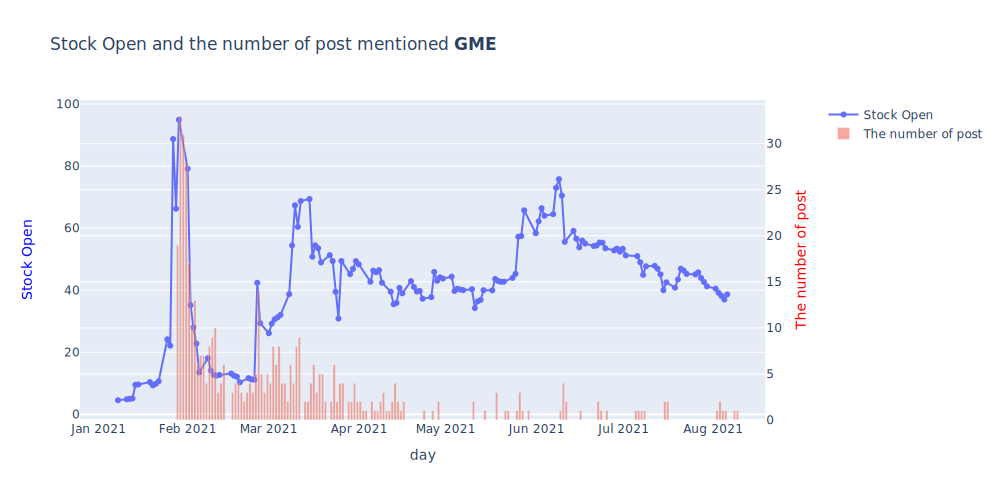

In [43]:
plot_stock_and_post_freq(df, "GME", stock_attr = "Open", resp_attr = 0)

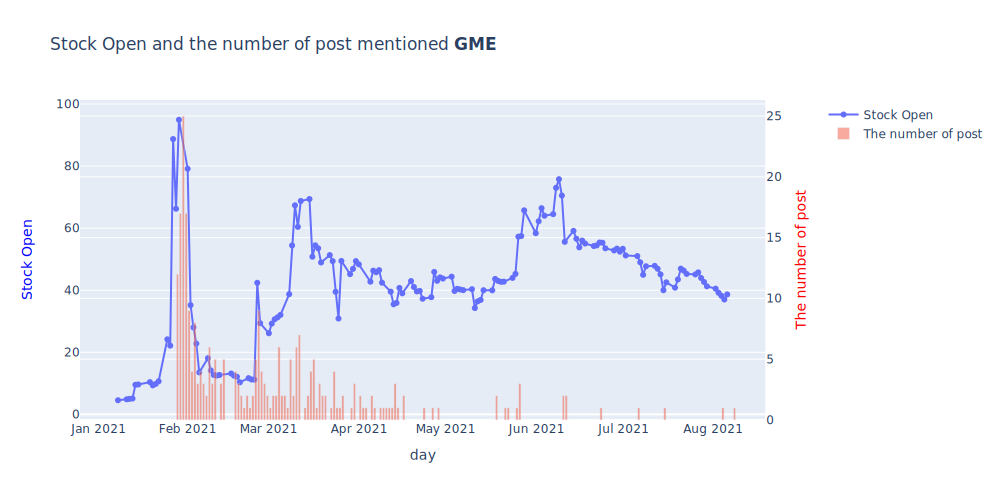

In [44]:
plot_stock_and_post_freq(df, "GME", stock_attr = "Open", resp_attr = 1)

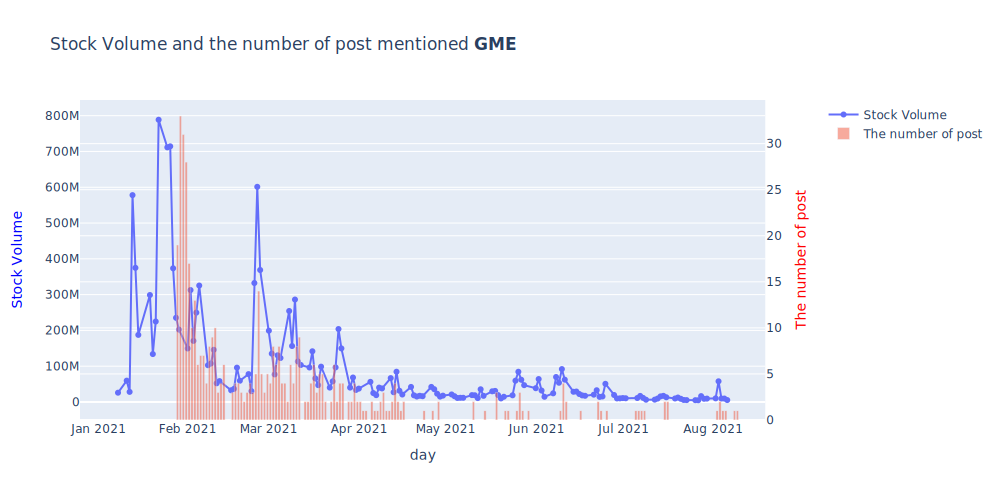

In [45]:
plot_stock_and_post_freq(df, "GME", "Volume")

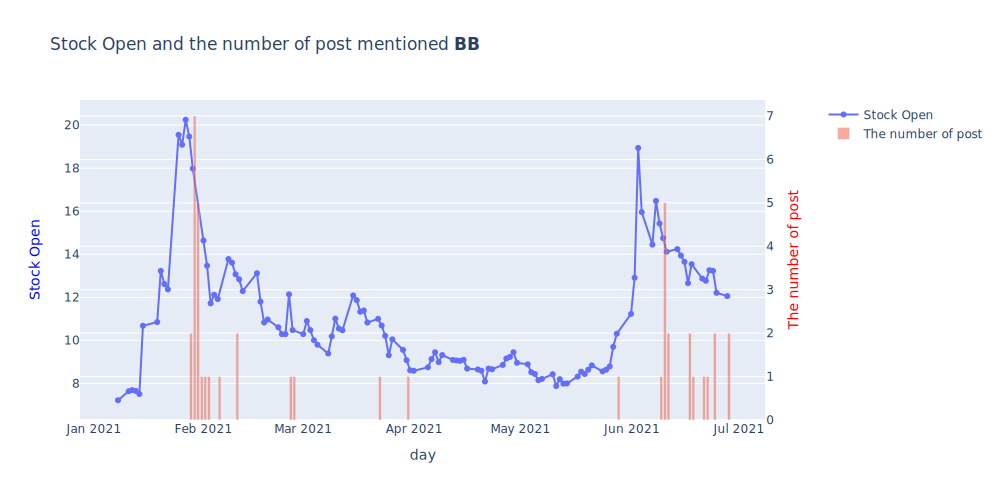

In [46]:
plot_stock_and_post_freq(df, "BB", "Open")

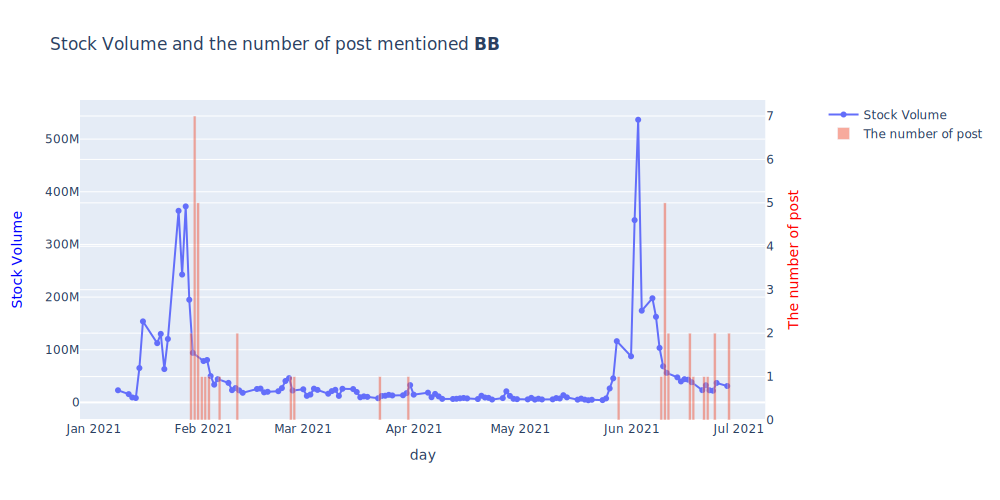

In [47]:
plot_stock_and_post_freq(df, "BB", "Volume")

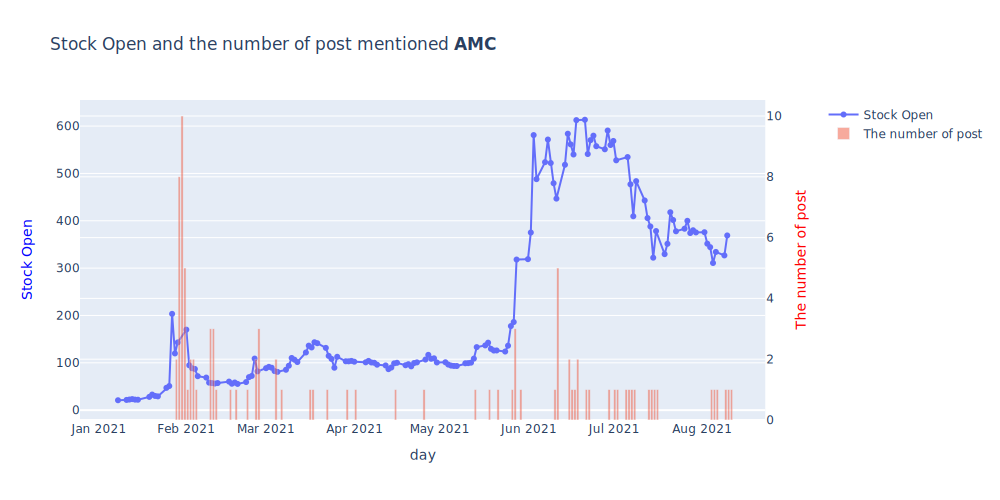

In [48]:
plot_stock_and_post_freq(df, "AMC", "Open")

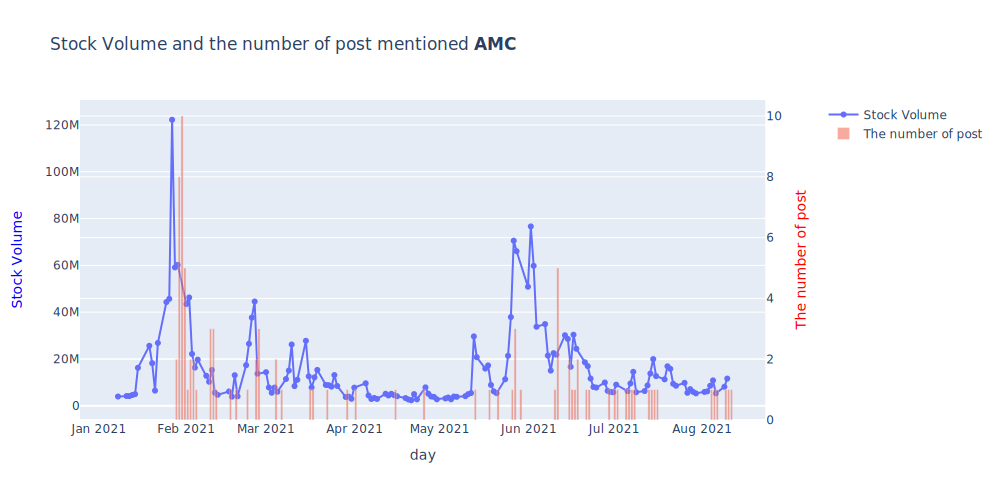

In [49]:
plot_stock_and_post_freq(df, "AMC", "Volume")

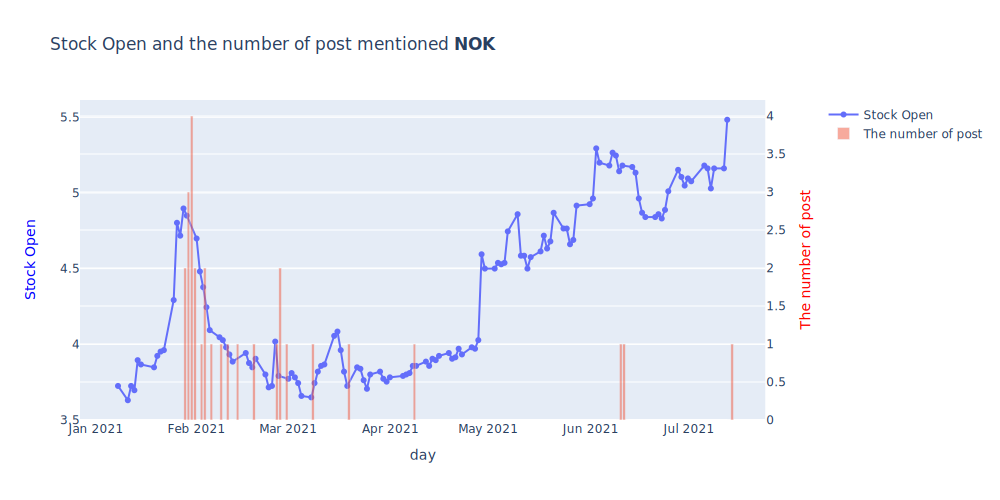

In [50]:
plot_stock_and_post_freq(df, "NOK", "Open")

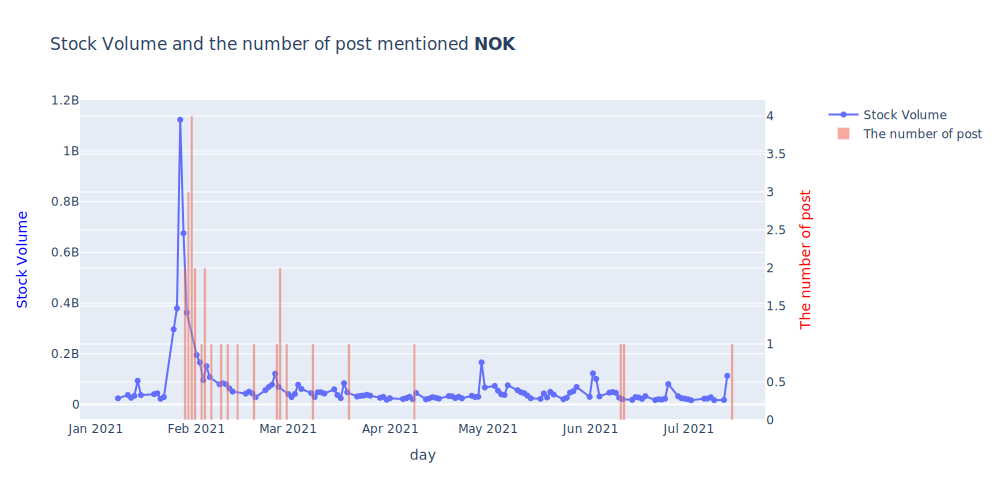

In [51]:
plot_stock_and_post_freq(df, "NOK", "Volume")

In [52]:
# %%capture --no-display
# for t in useful_ticker_symbol:
#     plot_stock_and_post_freq(df, t)